# SCC0275: Introdução a Ciência de Dados - 1o Semestre de 2021
# SCC0275 - Exercício 4

### Profa. Roseli A. F. Romero

### Monitor: Kenzo Sakiyama

Nro do grupo:

Alunos:


1.   List item
2.   List item


In [1]:
import pandas as pd

data = pd.read_csv("dataset_hepatitis.csv", na_values="?")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   AGE              155 non-null    int64  
 1   SEX              155 non-null    object 
 2   STEROID          154 non-null    object 
 3   ANTIVIRALS       155 non-null    object 
 4   FATIGUE          154 non-null    object 
 5   MALAISE          154 non-null    object 
 6   ANOREXIA         154 non-null    object 
 7   LIVER_BIG        145 non-null    object 
 8   LIVER_FIRM       144 non-null    object 
 9   SPLEEN_PALPABLE  150 non-null    object 
 10  SPIDERS          150 non-null    object 
 11  ASCITES          150 non-null    object 
 12  VARICES          150 non-null    object 
 13  BILIRUBIN        149 non-null    float64
 14  ALK_PHOSPHATE    126 non-null    float64
 15  SGOT             151 non-null    float64
 16  ALBUMIN          139 non-null    float64
 17  PROTIME         

In [2]:
data.head()

,AGE,SEX,STEROID,ANTIVIRALS,FATIGUE,MALAISE,ANOREXIA,LIVER_BIG,LIVER_FIRM,SPLEEN_PALPABLE,SPIDERS,ASCITES,VARICES,BILIRUBIN,ALK_PHOSPHATE,SGOT,ALBUMIN,PROTIME,HISTOLOGY,Class
0,30,male,no,no,no,no,no,no,no,no,no,no,no,1.0,85.0,18.0,4.0,NaN,no,1
1,50,female,no,no,yes,no,no,no,no,no,no,no,no,0.9,135.0,42.0,3.5,NaN,no,1
2,78,female,yes,no,yes,no,no,yes,no,no,no,no,no,0.7,96.0,32.0,4.0,NaN,no,1
3,31,female,NaN,yes,no,no,no,yes,no,no,no,no,no,0.7,46.0,52.0,4.0,80.0,no,1
4,34,female,yes,no,no,no,no,yes,no,no,no,no,no,1.0,NaN,200.0,4.0,NaN,no,1


# Questão 1

- a) Mostre que o atributo "BILIRUBIN" contém outliers
- b) Para o atributo citado, calcule a cerca inferior (LF) e superior (UF) para cada um dos atributos. Substitua o valor dos outliers pela cerca mais próxima (consultar Aula 3!). Para ser considerados outlier, os valores devem estar fora dos limites das cercas inferior ou superior.
- c) Compare boxplots de antes e depois da remoção de outliers utilizando as cercas.

<AxesSubplot:>

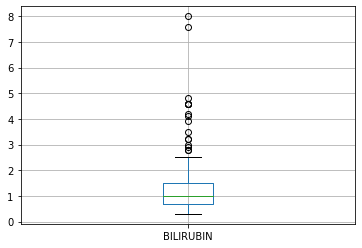

In [3]:
# a) Outliers podem ser fácilmente detectados a partir de boxplots (Pontos acima ou abaixo das cercas mostradas pelo pandas)
data.boxplot("BILIRUBIN")

In [10]:
def lf_uf(df, nome_attr):

    df = df.copy(deep=True)

    samples = df[nome_attr]

    Q1 = samples.quantile(0.25)
    Q3 = samples.quantile(0.75)
    IQR = Q3 - Q1

    LF = Q1 - 1.5*IQR
    UF = Q3 + 1.5*IQR

    print(f"LF: {LF} // UF: {UF}")

    # Determinando indices a serem modificados
    lower_than_LF = df[nome_attr] < LF
    greater_than_UF = df[nome_attr] > UF

    # Modificando valores
    df.loc[lower_than_LF, nome_attr] = LF
    df.loc[greater_than_UF, nome_attr] = UF

    return df

In [5]:
q1_df = lf_uf(data, "BILIRUBIN")

LF: -0.5000000000000002 // UF: 2.7


<AxesSubplot:>

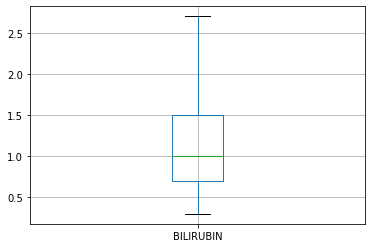

In [6]:
q1_df.boxplot("BILIRUBIN")

Para os próximos exercícios você pode continuar usando o conjunto de dados sem outliers no atributo analisado, ou usar os dados originais.

### Questão 02. 

Crie uma lista com atributos numéricos e outra com os atributos categóricos da base. Verifique quantos são numéricos e quantos são categóricos.

- Lembre-se de não considerar o atributo classe.

In [7]:
features_numericos = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT',
                      'ALBUMIN', 'PROTIME']

features_categoricos = ["SEX", "STEROID","ANTIVIRALS","FATIGUE","MALAISE",
                        "ANOREXIA","LIVER_BIG","LIVER_FIRM",
                        "SPLEEN_PALPABLE","SPIDERS","ASCITES","VARICES",
                        "HISTOLOGY"]

6 numéricos e 13 categóricos.

### Questão 03.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média - `mean` (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes - `most_frequent` (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar. 

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import numpy as np

def transformar_base(df, features_numericos, features_categoricos):
    transformer_numerico = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='mean')),
        ('scaler', StandardScaler())])

    transformer_categorico = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder())])

    preprocessor = ColumnTransformer(
        transformers=[
            ('numerico', transformer_numerico, features_numericos),
            ('categorico', transformer_categorico, features_categoricos),        
        ])
    data_t = preprocessor.fit_transform(df)
    data_t = np.c_[data_t, df.iloc[:, -1]]
    print(data_t.shape)
    return data_t

In [9]:
transformar_base(data, features_numericos, features_categoricos)

(155, 33)


array([[-0.89419175, -0.36093761, -0.43941439, ...,  1.        ,
         0.        ,  1.        ],
       [ 0.70257923, -0.44536414,  0.64153471, ...,  1.        ,
         0.        ,  1.        ],
       [ 2.93805862, -0.61421722, -0.20160559, ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 1.58080328, -0.52979068, -0.65560421, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.94209488,  0.06119507, -0.52589031, ...,  0.        ,
         1.        ,  1.        ],
       [ 0.14370939, -0.19208454, -0.11512966, ...,  0.        ,
         1.        ,  0.        ]])

### Questão 04

Compare o número de atributos antes e depois do pre-processamento. 


Resposta: 
Sem considerar o atributo classe, temos:
 - Antes: 19 colunas // Depois: 32 colunas.
 
Logo, o pre-processamento adicionou 13 novas colunas.

### Questão 05

Cite uma vantagem e uma desvantagem do pre-processamento realizado

Resposta: 

- Vantagens: Tratamento de valores ausentes facilita análises. Além disto a padronização/normalização de valores é necessária para a boa performance de algorítmos de AM.

- Desvantagens: Para valores numéricos, atributos padronizados/normalizados perdem o significado dos seus valores e não podem mais ser interpretados da mesma forma. Dependendo da cardinalidade dos valores categóricos, um grande número de colunas pode ser adicionado ao conjunto de dados o que impacta no armazenamento dos dados e no tempo de treinamento de algorítmos de AM.